# 프로젝트 이름

MZ세대 특화 도메인 별 투자의견 감정 분석을 통한 상위 긍/부정 문장 추출기

## 프로젝트 팀

MZ와 같이하자 가치투자(이동환, 최지웅, 황우진)

## 구현한 코드

[크롤링 및 텍스트 추출을 수행한 코드](https://github.com/sw-membership/ji_wung)

[모델 학습 및 예측을 수행한 코드](https://github.com/sw-membership/train-notebook)

[모델 학습에 사용한 데이터셋 코드](https://github.com/sw-membership/datasets)

[STT를 수행한 코드](https://github.com/sw-membership/ncloud-csr)

[번역을 수행한 코드](https://github.com/sw-membership/ncloud-papago)

## 참고한 코드

[sumy](https://github.com/miso-belica/sumy)

[pygooglenews](https://github.com/kotartemiy/pygooglenews)

[korea-sentence-splitter](https://github.com/likejazz/korean-sentence-splitter)

[spacy](https://github.com/explosion/spaCy)

## 제공데이터 분석

제공데이터를 통해, 20, 30대 중 buy&hold비중이 높은, 즉 20,30대 가치투자자 고객의 최다 보유종목을 총금액(20년 8월~21년 5월) 기준으로 파이차트로 시각화했습니다. 아래의 파이차트 내 삼성전자 (삼성전자+삼성전자우)의 파란색 비중이 보여주듯, 투자는 ‘대장주’에 편중돼있음을 알 수 있습니다.

In [ ]:
import csv
 
f = open('미래에셋증권_공모전데이터.csv', 'r', encoding='utf-8')
lines = csv.reader(f)

n = 0

#아래에서 선별할 variable들을 모을 list
list_all = []

for line in lines:
    
    #1열을 뽑아내서 각 행들의 observation을 row_name이란 리스트로 저장
    if(n==0):       
        row_name = line
        buy_hold_percent = [row_name.index('Buy&Hold비중_202105'),row_name.index('Buy&Hold비중_202104'),
                            row_name.index('Buy&Hold비중_202103'),row_name.index('Buy&Hold비중_202102'),
                            row_name.index('Buy&Hold비중_202101'),row_name.index('Buy&Hold비중_202012'),
                            row_name.index('Buy&Hold비중_202011'),row_name.index('Buy&Hold비중_202010'),
                            row_name.index('Buy&Hold비중_202009'),row_name.index('Buy&Hold비중_202008'), 
                            row_name.index('Buy&Hold비중_202007'),row_name.index('Buy&Hold비중_202006')]
    n +=1   
    
    #20대와 30대 연령만 선별
    if( (line[1].find('20') != -1) or (line[1].find('30') != -1) ):
        #buy&hold비중이 과반수를 넘기는 사람만 선별
        for num in buy_hold_percent :
            num = int(num)            
            if(int(float(line[num]) > 50)):
                list_all.append(line)    
    
f.close()    

In [ ]:
#저희의 분석 대상인 "20, 30대면서 buy&hold비중이 과반을 넘기는 고객"이 약 10만명임을 알아냈습니다. 
len(list_all)

106842

In [ ]:
#20년 7월부터 21년 5월까지 '주식보유1위종목의 column값'
hold_rank1 = [row_name.index('주식보유1위종목_202105'),row_name.index('주식보유1위종목_202104'),
              row_name.index('주식보유1위종목_202103'),row_name.index('주식보유1위종목_202102'),
              row_name.index('주식보유1위종목_202101'),row_name.index('주식보유1위종목_202012'),
              row_name.index('주식보유1위종목_202011'),row_name.index('주식보유1위종목_202010'),
              row_name.index('주식보유1위종목_202009'),row_name.index('주식보유1위종목_202008'),
              row_name.index('주식보유1위종목_202007'),row_name.index('주식보유1위종목_202006')]

hold_rank1

[33, 91, 149, 207, 265, 323, 381, 439, 497, 555, 613, 671]

In [ ]:
#2020년 7월부터 2021년 5월까지 '주식보유1,2,3위종목의 column값' 
#주식보유1위종목의 column값에 각각 1과 2를 더하면 주식보유 2위, 3위 종목도 알 수 있다.)

hold_rank_123 = []

for i in hold_rank1 :
    hold_rank_123.append(i)
    hold_rank_123.append(i+1)
    hold_rank_123.append(i+2)

#아래 출력값이 각 사용자들에게서 주식보유 1,2,3위 종목을 가져올 column값입니다. 
hold_rank_123

[33,
 34,
 35,
 91,
 92,
 93,
 149,
 150,
 151,
 207,
 208,
 209,
 265,
 266,
 267,
 323,
 324,
 325,
 381,
 382,
 383,
 439,
 440,
 441,
 497,
 498,
 499,
 555,
 556,
 557,
 613,
 614,
 615,
 671,
 672,
 673]

In [ ]:
##20년 8월부터 21년 5월까지 '주식보유1,2,3위'를 기록한 종목(key)와 보유금액(value)을 총합한 dictionary
stock_hold_total = {}

In [ ]:
for list in list_all : 
    for index in hold_rank_123 :        
        name = str(list[index])
        #종목 별 보유금액을 계속 더해나갑니다.
        stock_hold_total[name] = stock_hold_total.get(name, 0) + int(float(list[index+3]))
        
#주식보유 1,2,3위 종목이 '0'인 경우 삭제
del stock_hold_total['0']

In [ ]:
#20년 8월부터 21년 5월까지의 '주식보유1,2,3위'에 언급된 종목의 수
len(stock_hold_total.keys())

2311

In [ ]:
sorted_stock_hold_total = sorted(stock_hold_total.items(),key=(lambda x:x[1]), reverse =True)
# 총 보유금액 상위 10개 종목
sorted_stock_hold_total[:10]

[('A005930', 1016406935100),
 ('A035720', 241542637800),
 ('A068270', 227763841500),
 ('A005935', 213078400400),
 ('A030200', 194141226900),
 ('A005380', 108014229500),
 ('A035420', 102882467100),
 ('A015760', 86168925900),
 ('A003490', 75141614800),
 ('A034220', 71986907400)]

In [ ]:
## 시각화

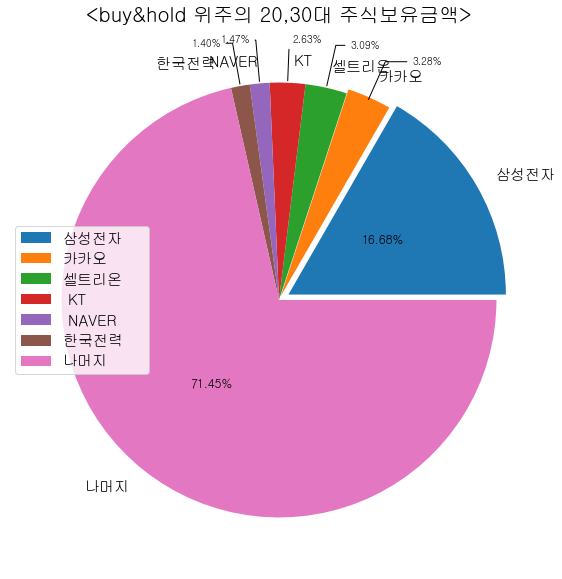

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

ratio = []
labels = []

n = -1
ratio_sum = 0
for i in sorted_stock_hold_total :
    n += 1
    if(n<7):
        labels.append(i[0])
        ratio.append(i[1])
    else : 
        ratio_sum += i[1]
        
labels.append('나머지')
ratio.append(ratio_sum)        

labels[0] = '삼성전자'
labels[1] = '카카오'
labels[2] = '셀트리온'
labels[3] = '삼성전자우'
labels[4] = ' KT'
labels[5] = " NAVER"
labels[6] = '한국전력    '

#삼성전자우를 삼성전자에 포함시키기 
del labels[3]
ratio[0] += ratio[3]
del ratio[3]


fig = plt.figure(figsize=(10,10)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 

explode = [0.05, 0.02, 0, 0, 0, 0, 0]

#한국어 폰트
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#pie chart에 parameter입력
pie = ax.pie(ratio, explode = explode, labels = labels,  textprops={'fontsize': 15}) 

#아래 코드는 비율이 겹치지 않고 가독성 있게 합니다.
total = np.sum(ratio) 
threshold = 5 
sum_pct = 0 
 
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) 
 
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 
    center, r = ax.patches[i].center, ax.patches[i].r 
    
    if i < len(labels) - 1:
        sum_pct += float(f'{ratio[i]/total*100:.2f}')
        text = f'{ratio[i]/total*100:.2f}%'
    else: 
        text = f'{100-sum_pct:.2f}%'
    
    if ratio[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 
        x = np.cos(np.deg2rad(ang)) 
        y = np.sin(np.deg2rad(ang))
        
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) 
        config["arrowprops"].update({"connectionstyle": connectionstyle}) 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] 
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] 
        ax.text(x,y,text,ha='center',va='center',fontsize=12)

# 최종적으로 파이차트 구현
plt.legend(loc = 'center left',fontsize ='15')
plt.title('<buy&hold 위주의 20,30대 주식보유금액>', fontsize ='20')
plt.show()



## 모델 학습

캐글의 [sentiment-analyis-for-financial-news](https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news/) 데이터셋을 사용하여 모델을 학습하였습니다. 이는 주식 금융 뉴스에 대해 긍정, 부정, 중립 3가지 레이블로 약 5000여개의 데이터를 분류한 데이터셋입니다.

해당 데이터셋을 전처리한 후 데이터셋을 train, val, test 로 약 8:1:1 비율로 분리하여 학습을 수행했습니다.

자연어 처리를 위해 electra 모델을 사용하였으며 pre-trained 로  hugging-face의 google/electra-small-discriminator를 사용하였습니다.

다음 하이퍼파라미터를 통해 학습을 수행했으며 Colab 환경 기반에서 수행되었습니다.

```
epochs = 200
learning_rate = 1e-4
weight_decay = 0.0
adam_epsilon = 1e-8
max_grad_norm = 1.0
batch_size = 32
optimizer = AdamW
scheduler = linear
```

test 데이터셋 예측 결과 f1 score 는 다음과 같습니다.

```
0.9589840173721313
```

## 유튜브 댓글 분석

특정 주식 종목과 관련된 내용을 다루는 유튜브 영상에서 개인 투자자들의 댓글을 가져와서 이를 전처리하고 분석합니다.

1. 유튜브 영상에 작성된 댓글을 수집합니다.
2. 수집한 댓글에서 의미없는 댓글이나 은어 등을 제거해주는 전처리 과정을 거칩니다.
3. 네이버 CLOVA API를 사용하여 한글 텍스트를 영어로 번역합니다.
4. 번역한 결과를 바탕으로 사전에 훈련한 모델을 사용하여 영어 텍스트를 기반으로 감정 분석을 수행합니다.
5. 분석을 통해 개인 투자자들의 해당 종목에 대한 의견이 긍정 혹은 부정인지 또는 중립의 의견을 가졌는지 결과로 도출합니다.

## 한국 증권 유튜버 영상 분석

MZ 세대가 주로 증권 정보를 얻는 유명 유튜버들의 영상으로부터 정보를 가져와서 이를 전처리하고 분석합니다.

1. 유튜브에서 직접 영상을 추출합니다.
2. 추출한 영상으로부터 네이버 STT(Speech To Text) API 를 사용하여 한글 텍스트를 추출합니다.
3. 한글 텍스트를 네이버 번역 API 를 사용하여 영어로 번역합니다.
4. 훈련한 모델을 사용해서 영어 텍스트를 기반으로 감정 분석을 수행합니다.
5. sumy 를 사용해서 예측한 레이블을 바탕으로 긍정, 부정 각 3개씩 중요 문장을 추출합니다.

## 외국 증권 유튜버 영상 분석

MZ 세대가 주로 증권 정보를 얻을 수도 있다는 외국 유튜버들의 영상으로부터 정보를 가져와서 이를 전처리하고 분석합니다.

1. 유튜브에서 직접 영상 캡션 자막을 추출합니다.
2. 추출한 캡션 자막을 문장 세그멘테이션 등 전처리를 수행합니다.
3. 훈련한 모델을 사용해서 영어 텍스트를 기반으로 감정 분석을 수행합니다.

## 구글 미국 뉴스 분석

‘pygooglenews’ 라이브러리를 활용해 검색어 ("종목 명(영어) + stock"), 검색기간(21년 5월~9월), 검색지역(미국)으로 설정하고 도출한 뉴스 url들을 크롤링했습니다. 위와 같은 과정을 거쳐 감성분석을 진행했습니다. 


## 증권사 리포트 분석

1. 한경컨센서스’ 에서 pdf 형식의 국내 증권사 리포트를 크롤링했습니다.
2.  tika라이브러리를 활용해 pdf파일에서 텍스트를 추출했습니다.  
3.  위와 같은 과정을 거쳐 감성분석을 진행했습니다. 

# 최종 결과물

1. 도메인 별 긍부정 분석
2. 도메인 별 sumy 분석

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [1]:
!git clone https://github.com/sw-membership/results

Cloning into 'results'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 29 (delta 2), reused 26 (delta 2), pack-reused 0
Unpacking objects: 100% (29/29), done.


### 1. 도메인 별 긍부정 분석

In [26]:
def sentiment_stat(path):
    with open(path, 'r') as f:
        lines = f.readlines()

    negative, neutral, positive = 0, 0, 0
    for line in lines:
        label = line.split(',')[0]

        if label == '0': negative += 1
        elif label == '1': neutral += 1
        elif label == '2': positive += 1

    return negative, neutral, positive

def pos_neg_ratio(path):
    with open(path, 'r') as f:
        lines = f.readlines()

    negative, neutral, positive = 0, 0, 0
    for line in lines:
        label = line.split(',')[0]

        if label == '0': negative += 1
        elif label == '1': neutral += 1
        elif label == '2': positive += 1

    total = negative + neutral + positive

    negative_ratio = negative / total * 100
    positive_ratio = positive / total * 100

    # 부정, 긍정 댓글 비율
    return negative_ratio, positive_ratio

def ratio_to_string(negative_ratio, positive_ratio):
    return f'부정 비율: {negative_ratio}%\n긍정 비율: {positive_ratio}%'

In [27]:
def draw(ratio, title):
    labels = ['negative', 'neutral', 'positive']

    fig = plt.figure(figsize=(10,10)) 
    fig.set_facecolor('white') 
    ax = fig.add_subplot()

    pie = ax.pie(ratio,labels = labels, autopct='%.1f%%', textprops={'fontsize': 15}) 

    plt.legend(loc = 'upper left',fontsize ='15')
    plt.title(title, fontsize ='20')
    plt.show()

#### 유튜브 댓글 분석
유튜브 채널 ‘슈카월드’, ‘돈깡의 알고하는 투자’, ‘재테크 연구소’, ‘Change Ground’ 총 네 개의 채널에서 MZ세대의 Buy & Hold 비중이 가장 높은 종목인 삼성전자에 관련된 댓글만 추출하여 분석하였습니다. 유튜브 댓글 중 매수나 매도에 관련된 내용이 포함된 문장은 극명하게 긍정/부정의 결과가 나왔고, 그렇지 않은 대부분의 댓글에서는 중립의 결과가 나왔습니다.

다음 파이 차트에서 볼 수 있듯, 약 75%의 댓글이 중립으로 나타났습니다.

이를 통해, 댓글을 단 사람들이 삼성전자에 관해 과도하게 긍정적, 부정적으로 생각하지 않고, 비교적 중립적인 관점으로 투자를 고민하고 있음을 알 수 있습니다.
즉, 댓글 분석을 통해 특정 종목에 대해 비이성적 과열 여부를 확인할 수 있다는 함의가 있습니다.

In [28]:
youtube_comment_path = 'results/유튜브댓글/result.txt'
pos, neg = pos_neg_ratio(youtube_comment_path)
print(ratio_to_string(pos, neg))

부정 비율: 12.420382165605096%
긍정 비율: 12.420382165605096%


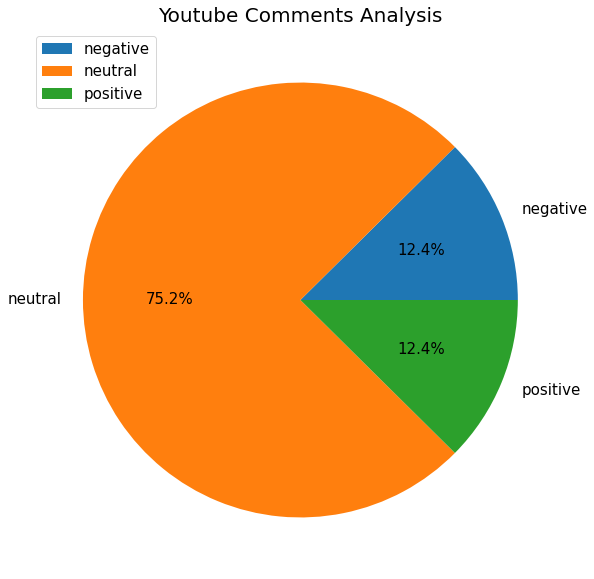

In [29]:
stat = sentiment_stat(youtube_comment_path)
draw(stat, 'Youtube Comments Analysis')

#### 한국 유튜브 분석

In [30]:
kor_youtube_path_1 = 'results/한국유튜버/result1.txt'
kor_youtube_path_2 = 'results/한국유튜버/result2.txt'
kor_youtube_path_3 = 'results/한국유튜버/result3.txt'

pos1, neg1 = pos_neg_ratio(kor_youtube_path_1)
pos2, neg2 = pos_neg_ratio(kor_youtube_path_2)
pos3, neg3 = pos_neg_ratio(kor_youtube_path_3)

print(ratio_to_string(pos1, neg1), end='\n\n')
print(ratio_to_string(pos2, neg2), end='\n\n')
print(ratio_to_string(pos3, neg3), end='\n\n')

부정 비율: 11.79245283018868%
긍정 비율: 17.92452830188679%

부정 비율: 10.48951048951049%
긍정 비율: 12.587412587412588%

부정 비율: 14.705882352941178%
긍정 비율: 10.294117647058822%



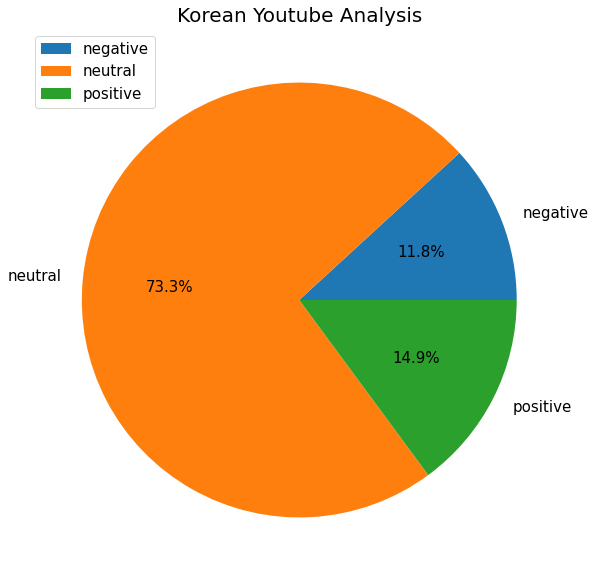

In [31]:
stat1 = sentiment_stat(kor_youtube_path_1)
stat2 = sentiment_stat(kor_youtube_path_2)
stat3 = sentiment_stat(kor_youtube_path_3)

negative = stat1[0] + stat2[0] + stat3[0]
neutral = stat1[1] + stat2[1] + stat3[1]
positive = stat1[2] + stat2[2] + stat3[2]

stat = [negative, neutral, positive]

draw(stat, 'Korean Youtube Analysis')

#### 외국 유튜브 분석

In [32]:
eng_youtube_path_1 = 'results/외국유튜버/result1.txt'
eng_youtube_path_2 = 'results/외국유튜버/result2.txt'

pos1, neg1 = pos_neg_ratio(eng_youtube_path_1)
pos2, neg2 = pos_neg_ratio(eng_youtube_path_2)

print(ratio_to_string(pos1, neg1), end='\n\n')
print(ratio_to_string(pos2, neg2), end='\n\n')

부정 비율: 0.0%
긍정 비율: 23.52941176470588%

부정 비율: 2.666666666666667%
긍정 비율: 21.333333333333336%



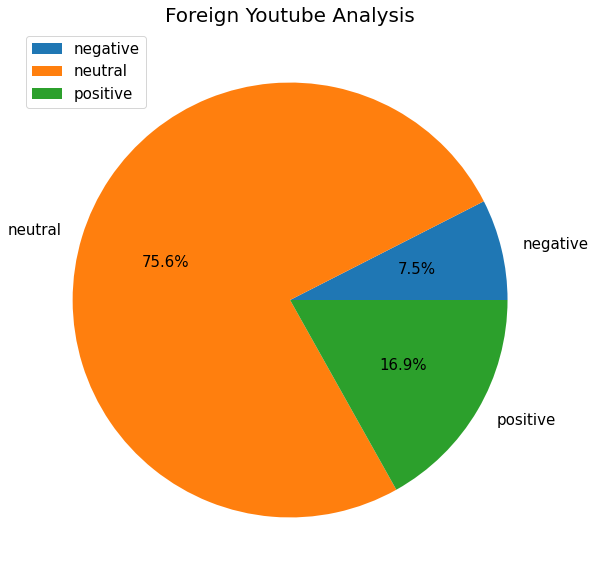

In [34]:
stat1 = sentiment_stat(eng_youtube_path_1)
stat2 = sentiment_stat(eng_youtube_path_2)

negative = stat1[0] + stat2[0] + stat3[0]
neutral = stat1[1] + stat2[1] + stat3[1]
positive = stat1[2] + stat2[2] + stat3[2]

stat = [negative, neutral, positive]

draw(stat, 'Foreign Youtube Analysis')

#### 구글 뉴스 분석

In [35]:
google_news_path = 'results/구글뉴스/result.txt'
pos, neg = pos_neg_ratio(google_news_path)
print(ratio_to_string(pos, neg))

부정 비율: 9.022556390977442%
긍정 비율: 30.075187969924812%


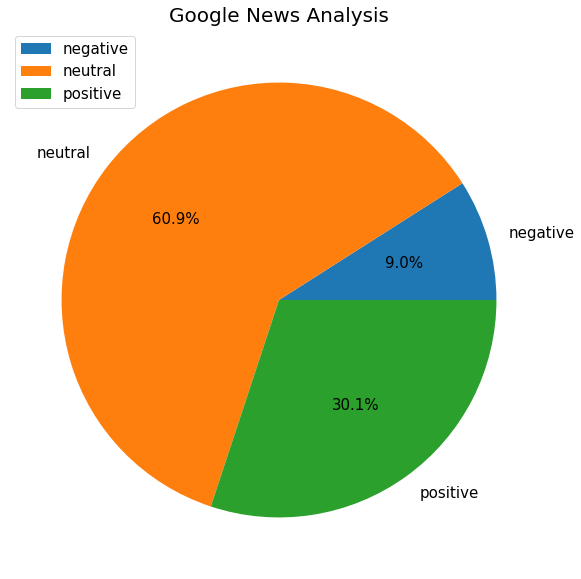

In [36]:
stat = sentiment_stat(google_news_path)
draw(stat, 'Google News Analysis')

#### 증권사 리포트

In [38]:
report_path_1 = 'results/증권사리포트/result1.txt'
report_path_2 = 'results/증권사리포트/result2.txt'
report_path_3 = 'results/증권사리포트/result3.txt'
report_path_4 = 'results/증권사리포트/result4.txt'

pos1, neg1 = pos_neg_ratio(report_path_1)
pos2, neg2 = pos_neg_ratio(report_path_2)
pos3, neg3 = pos_neg_ratio(report_path_3)
pos4, neg4 = pos_neg_ratio(report_path_4)

print(ratio_to_string(pos1, neg1), end='\n\n')
print(ratio_to_string(pos2, neg2), end='\n\n')
print(ratio_to_string(pos3, neg3), end='\n\n')
print(ratio_to_string(pos4, neg4), end='\n\n')

부정 비율: 9.782608695652174%
긍정 비율: 31.521739130434785%

부정 비율: 11.76470588235294%
긍정 비율: 35.294117647058826%

부정 비율: 10.526315789473683%
긍정 비율: 68.42105263157895%

부정 비율: 6.666666666666667%
긍정 비율: 60.0%



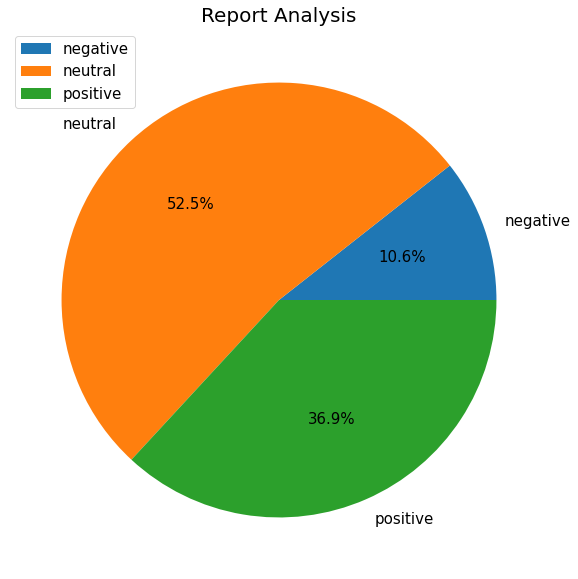

In [40]:
stat1 = sentiment_stat(report_path_1)
stat2 = sentiment_stat(report_path_2)
stat3 = sentiment_stat(report_path_3)
stat4 = sentiment_stat(report_path_4)

negative = stat1[0] + stat2[0] + stat3[0]
neutral = stat1[1] + stat2[1] + stat3[1]
positive = stat1[2] + stat2[2] + stat3[2]

stat = [negative, neutral, positive]

draw(stat, 'Report Analysis')

### 2. 도메인 별 sumy 분석

한국 유튜버 영상, 외국 유튜버 영상, 구글 뉴스, 증권사 리포트 sumy 분석

이 부분이 저희 서비스의 핵심입니다. 한국 유튜브 영상, 증권사 레포트, 구글 뉴스에서 추출한 문장에서 긍정 문장의 순위, 부정 문장의 순위를 sumy 라이브러리를 활용해 도출했습니다.

sumy라이브러리는 핵심 문장 순으로 요약해주는 라이브러리입니다.
(sumy 라이브러리의 성능이 영어로 input했을 때 가장 잘 나오기에,) 모든 한국어 문장을 '네이버 파파고 api’를 통해 영어로 번역한 후 순위를 매겼습니다.
최종적으로 긍/부정 1,2,3위 문장을 다시 한국어로 번역해 보여주었습니다.

In [3]:
def pos_neg_sumy(path):
    with open(path, 'r') as f:
        lines = []
        while True:
            line = f.readline()
            if not line: break
            if line == '\n': continue
            lines.append(line.strip())

    if len(lines) < 7:
        return [lines[1], lines[2], lines[3]], [lines[5]]
    if len(lines) < 8:
        return [lines[1], lines[2], lines[3]], [lines[5], lines[6]]
    return [lines[1], lines[2], lines[3]], [lines[5], lines[6], lines[7]]

pos, neg = pos_neg_sumy('results/한국유튜버/sumy1.txt')
neg

['제가 알기로는, 세계의 몇몇 회사들은 결국 약을 재배하고 있고, 삼성전자, 하이닉스, 그리고 한국은 시각 장애가 있습니다.',
 '그런 관점에서 그들은 금연이 게으르다고 긍정적으로 보았지만, 최근에는 증권사들의 보고서가 타격을 조장하고 외국에서는 바로 나온다고 말했다.',
 '우선주가 4.2% 이상의 장애로 예배당에 방해가 되고 있다는 점을 감안하면 월 2% 이상의 경각심과 후유증을 줄일 수 있는 기업은 삼성전자와 현대차 포스코를 견뎌낼 수 있다고 말하고 싶다.']

#### 한국 유튜브


In [10]:
kor_youtube_sumy_1 = 'results/한국유튜버/sumy1.txt'
kor_youtube_sumy_2 = 'results/한국유튜버/sumy2.txt'
kor_youtube_sumy_3 = 'results/한국유튜버/sumy3.txt'

pos1, neg1 = pos_neg_sumy(kor_youtube_sumy_1)
pos2, neg2 = pos_neg_sumy(kor_youtube_sumy_2)
pos3, neg3 = pos_neg_sumy(kor_youtube_sumy_3)

print('한국 유튜브 첫번째 영상 긍정 분석')
print(f'1순위: {pos1[0]}\n2순위: {pos1[1]}\n3순위: {pos1[2]}', end='\n\n')
print('한국 유튜브 두번째 영상 긍정 분석')
print(f'1순위: {pos2[0]}\n2순위: {pos2[1]}\n3순위: {pos2[2]}', end='\n\n')
print('한국 유튜브 세번째 영상 긍정 분석')
print(f'1순위: {pos3[0]}\n2순위: {pos3[1]}\n3순위: {pos3[2]}', end='\n\n')

한국 유튜브 첫번째 영상 긍정 분석
1순위: 저는 쉽게 캐릭터에 다가가지 않지만, 엄청난 변동성과 함께 열심히 흔들고 있습니다. 제가 오늘 재미를 본다면, 몇몇 주식이 상승해서 좋다고 말할 것이고, 그러면 투자자들은 빚을 내서 그것을 살 수 있을 것입니다.
2순위: 천안커튼숍에서 아내, 동료와 함께 일을 잘 해온 청하 씨, 공부를 열심히 하면 능이 언니한테 보여주려면 잘 먹어야 할 것 같아요.
3순위: 그래서, 청소부들이 총 수요의 급증으로 약 1조 원을 가져간 후, 일주일 동안 방문한 외국인들은 약 4도의 배당금을 받았다.

한국 유튜브 두번째 영상 긍정 분석
1순위: 내가 말하고 또 하는 것처럼 보이는 플랫폼 카백에 65,000원 이하로 살 수 있는 기회를 주신다면, 그만 살 수 있을까요?
2순위: 전무이사는 은행과 같은 서비스를 하는 Imo Flipper Washing 5.0과 매주 컨테스트를 하지 않습니다. 하지만 주식에 능숙한 사람들과 주식에 서툰 사람들의 특성을 살펴보면요.
3순위: 하기 싫어서 국민 여러분께 사과드리지만, 제 성격은 매우 낙천적이고, 트럼프 대통령이 대통령 발언을 어디서 다루든 간에, 그것은 다시 올라갑니다.

한국 유튜브 세번째 영상 긍정 분석
1순위: 오늘날 아시아인들을 보면, 엄씨라는 이름의 외국인이 1조 6000억원을 해결했다.
2순위: 오늘 외국인의 매도세는 대부분 삼성전자와 SK하이닉스 임직원들이 하기 때문에 오늘 고생한 것을 보면 금융투자가 증권사보다 2.8배, 코스피 연기금을 2600억원 가량 팔아치우고 있으며 거의 대부분이 삼성전자의 멘토다.
3순위: 현재의 논란은 반도체 가격에 대한 논란이고 하이 한양은 겨울에 잘 팔리고 일부 휴대폰은 하반기에 잘 팔릴 것이기 때문에 반도체 중심의 애국가는 한국과 오늘날 한국의 현실을 갉아먹고 있다.



In [11]:
print('한국 유튜브 첫번째 영상 부정 분석')
print(f'1순위: {neg1[0]}\n2순위: {neg1[1]}\n3순위: {neg1[2]}', end='\n\n')
print('한국 유튜브 두번째 영상 부정 분석')
print(f'1순위: {neg2[0]}\n2순위: {neg2[1]}\n3순위: {neg2[2]}', end='\n\n')
print('한국 유튜브 세번째 영상 부정 분석')
print(f'1순위: {neg3[0]}\n2순위: {neg3[1]}\n3순위: {neg3[2]}', end='\n\n')

한국 유튜브 첫번째 영상 부정 분석
1순위: 제가 알기로는, 세계의 몇몇 회사들은 결국 약을 재배하고 있고, 삼성전자, 하이닉스, 그리고 한국은 시각 장애가 있습니다.
2순위: 그런 관점에서 그들은 금연이 게으르다고 긍정적으로 보았지만, 최근에는 증권사들의 보고서가 타격을 조장하고 외국에서는 바로 나온다고 말했다.
3순위: 우선주가 4.2% 이상의 장애로 예배당에 방해가 되고 있다는 점을 감안하면 월 2% 이상의 경각심과 후유증을 줄일 수 있는 기업은 삼성전자와 현대차 포스코를 견뎌낼 수 있다고 말하고 싶다.

한국 유튜브 두번째 영상 부정 분석
1순위: 네, 한국은 항상 휴일 효과가 있어서, 아직 자동차 개장 시장이 약해서, 올해 10월에는 항상 가족들과 함께 싸게 주식을 살 기회가 있기 때문에 얼마나 오랫동안 빠져있을지 모르겠어요.
2순위: 하지만 Sing 8의 문제는 9월과 10월에 떨어지는 한 여성이 있다는 것이다. 그래서 관중들이 그들의 상상력으로 돈을 버는 많은 주식을 주워 담기에는 위험한 시기이다.
3순위: 그래서 만약 내가 65,000원 이하로 살 기회를 준다면, 카카오뱅크는 분명 사기로 고통 받고 혁신적인 회사로 떨어지면 그것을 살 것이다.

한국 유튜브 세번째 영상 부정 분석
1순위: 이러한 상황이 어떻게 발생하게 되었는지, 저는 최근 삼성전자의 하향 보고서를 작성했고 이 가격이 어떻게 떨어질지 경고했습니다.
2순위: 국내 6개 기관 중 한 곳은 대만의 시장조사기관인 트렌드플러스(Trend Plus)에서 D램 가격이 떨어질 수 있다는 이유로 함평냉면의 목표주가를 9만5000원씩 내렸다.
3순위: 올 하반기에 경제가 침체되면서 몬텔의 다른 쪽에 대한 수요는 감소할 것이다.



#### 구글 뉴스

In [15]:
google_news_sumy_1 = 'results/구글뉴스/sumy.txt'

pos1, neg1 = pos_neg_sumy(google_news_sumy_1)

print('구글 뉴스 긍정 분석')
print(f'1순위: {pos1[0]}\n2순위: {pos1[1]}\n3순위: {pos1[2]}', end='\n\n')

구글 뉴스 긍정 분석
1순위: 한 고위 임원은 5G 롤아웃이 확대되고 업계 선두주자인 중국 화웨이 테크놀로지스가 국내 시장에 집중함에 따라, 삼성전자는 네트워크 장비 사업의 성장 모멘텀을 유지하기 위해 유럽에 기대를 걸고 있다고 말했다.
2순위: 서버에 대한 DRAM 수요는 2018년과 2021년 사이에 17.5%의 연평균 성장률을 보일 것입니다. "Hot ICs: 특히, 소비자들은 집을 깨끗하게 하는 제품에 기꺼이 돈을 뿌렸습니다.
3순위: 브라질과 다른 신흥 경제국에서는 한때 식기세척기와 로봇청소기에 의존했던 가정들이 이제는 투자를 하고 있는 반면 삼성은 올 1월부터 7월까지 공기청정기 해외 판매가 작년 같은 기간에 비해 5배 이상 급증했다고 말한다.



In [16]:
print('구글 뉴스 부정 분석')
print(f'1순위: {neg1[0]}\n2순위: {neg1[1]}\n3순위: {neg1[2]}', end='\n\n')

구글 뉴스 부정 분석
1순위: 지난 1월부터 3월까지보다 적은 스마트폰을 출하했음에도 불구하고 한국의 거대 기술기업인 하이닉스의 강력한 실적은 비축량을 고갈시키고 생산능력을 채운 칩에 대한 성층권 수요를 강조하고 있다.
2순위: 그의 가석방에 대한 지지는 한국의 거대 기술기업에서 핵심 전략적 결정이 내려지지 않고 있다는 불안감 속에서 커져왔다.
3순위: 여론조사가 이 대통령의 가석방에 대한 국민의 높은 지지를 보여준 반면, 많은 시민 단체들은 한국의 정계와 재계 엘리트들 사이의 부패에 대한 분노의 물결로 집권한 문재인 대통령의 위선을 비난하며 반대해 왔다.



#### 증권사 리포트

In [22]:
report_sumy_1 = 'results/증권사리포트/sumy1.txt'
report_sumy_2 = 'results/증권사리포트/sumy2.txt'
report_sumy_3 = 'results/증권사리포트/sumy3.txt'
report_sumy_4 = 'results/증권사리포트/sumy4.txt'

pos1, neg1 = pos_neg_sumy(report_sumy_1)
pos2, neg2 = pos_neg_sumy(report_sumy_2)
pos3, neg3 = pos_neg_sumy(report_sumy_3)
pos4, neg4 = pos_neg_sumy(report_sumy_4)

print('증권사 첫번째 리포트 긍정 분석')
print(f'1순위: {pos1[0]}\n2순위: {pos1[1]}\n3순위: {pos1[2]}', end='\n\n')
print('증권사 두번째 리포트 긍정 분석')
print(f'1순위: {pos2[0]}\n2순위: {pos2[1]}\n3순위: {pos2[2]}', end='\n\n')
print('증권사 세번째 리포트 긍정 분석')
print(f'1순위: {pos3[0]}\n2순위: {pos3[1]}\n3순위: {pos3[2]}', end='\n\n')
print('증권사 네번째 리포트 긍정 분석')
print(f'1순위: {pos4[0]}\n2순위: {pos4[1]}\n3순위: {pos4[2]}', end='\n\n')

증권사 첫번째 리포트 긍정 분석
1순위: 시스템반도체사업부도 오스틴 조기 정상화(단, 매출 감소에도 SCM 역량 강화, 마케팅 효율성 향상, 웨어러블 제품 기여 등으로 예상보다 높은 수익성 유지)로 실적이 개선됐다.
2순위: 비트 출하량은 D램 15나노미터와 낸드 6세대 128단 변환의 가속화로 인해 증가할 것으로 예상된다.
3순위: 파운드리사는 하반기 평택 S5의 공급능력을 확대하여 성장을 가속화할 계획이다. 신제품 출시를 통한 중소형 패널 성능 향상 기대

증권사 두번째 리포트 긍정 분석
1순위: (괄호 안에 2분기 영업이익) ASP 상승과 환율 영향으로 메모리 마진이 더욱 커지고 비메모리도 상반기 대비 실적이 개선될 전망이다.
2순위: 시스템반도체사업부도 오스틴 조기 정상화(단, 매출 감소에도 SCM 역량 강화, 마케팅 효율성 향상, 웨어러블 제품 기여 등으로 예상보다 높은 수익성 유지)로 실적이 개선됐다.
3순위: 파운드리사는 하반기 평택 S5의 공급능력을 확대하여 성장을 가속화할 계획이다. 신제품 출시를 통한 중소형 패널 성능 향상 기대

증권사 세번째 리포트 긍정 분석
1순위: 낸드 가격은 전분기 대비 7% 상승하며 128단계 본격 양산에 따른 원가/비트 절감 효과가 반영된다.
2순위: IM과 세트사업부 CE는 하반기 성수기 진입과 신제품 출시에 따른 실적 성장, 삼성전자 애플 등 스마트폰 신제품 판매 등으로 호조를 보일 것으로 전망된다.
3순위: 모바일과 서버를 중심으로 한 강력한 수요증가에 대응하기 위해 삼성전자 P3(평택3차) 등 메모리반도체 업체들의 신규 공장 투자가 본격화될 전망이다.

증권사 네번째 리포트 긍정 분석
1순위: D램은 EUV 추가 구매와 DDR5 양산에 34조원을 투자하고 8세대 V낸드 양산 및 eSSD 수요 증가에 대비하기 위해 총 35조원을 낸드에 투자하기로 했다.
2순위: 이를 통해 D램의 기술격차가 다시 벌어지고 낸드 부문 점유율이 확대되며 파운드리도 신규 고객 확보에 성공하게 된다.
3순위: 낸드 수급 우려가 확대될

In [24]:
print('증권사 첫번째 리포트 부정 분석')
print(f'1순위: {neg1[0]}\n2순위: {neg1[1]}\n3순위: {neg1[2]}', end='\n\n')
print('증권사 두번째 리포트 부정 분석')
print(f'1순위: {neg2[0]}\n2순위: {neg2[1]}\n3순위: {neg2[2]}', end='\n\n')
print('증권사 세번째 리포트 부정 분석')
print(f'1순위: {neg3[0]}\n2순위: {neg3[1]}', end='\n\n')
print('증권사 네번째 리포트 부정 분석')
print(f'1순위: {neg4[0]}', end='\n\n')

증권사 첫번째 리포트 부정 분석
1순위: 코스피지수(오른쪽,p)와 비교하면 중소형 비수기 영향으로 출하량은 줄었지만 전반적인 매매가격 상승과 일회성 이익으로 전분기보다는 호전됐다.
2순위: 대형 LCD는 계절적 비수기, 부품 공급 부족, 코로나로 인한 인도와 베트남에서의 생산 차질 등의 영향을 받았는데, 이는 라디오 적자로 인한 스폿폰 수요 감소로 인한 것이다. 코로나
3순위: 메모리 업체들의 D램과 낸드 재고량은 상당히 낮은 수준에 머물 것이다.

증권사 두번째 리포트 부정 분석
1순위: 그럼에도 불구하고, 세트 매출과 반도체 출하량의 불일치와 내년 상반기 사업 상황에 대한 의혹은 풀리지 않고 있다.
2순위: 코스피지수(오른쪽,p)와 비교하면 중소형 비수기 영향으로 출하량은 줄었지만 전반적인 매매가격 상승과 일회성 이익으로 전분기보다는 호전됐다.
3순위: 대형 LCD는 계절적 비수기, 부품 공급 부족, 코로나로 인한 인도와 베트남에서의 생산 차질 등의 영향을 받았는데, 이는 라디오 적자로 인한 스폿폰 수요 감소로 인한 것이다. 코로나

증권사 세번째 리포트 부정 분석
1순위: 수요에 대한 시장 눈높이 제고 필요 D램 공급업체와 고객의 재고 수준이 다르게 움직이면서 시장 참여자들 사이에 혼란을 야기한다.
2순위: 시장 참가자들은 재고 증가로 D램 가격 하락 압력이 커질 것으로 우려하고 있지만 아직까지 가격 하락에 대한 명확한 상황은 보이지 않고 있다.

증권사 네번째 리포트 부정 분석
1순위: D램의 업종 둔화 우려는 이미 현 주가수준에 반영됐지만 낸드의 올 연말 급격한 둔화로 단기 주가 변동성이 확대될 것으로 회사 측은 보고 있다.

